# Train Autoencoder

### Import Modules

In [1]:
# external modules
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from pytorch_lightning.trainer import Trainer
# internal modules
from AE_model import AutoEncoder
from dataset_AE import Dataset_1d

In [2]:
# net parameters
latent_dimension = 2
variable_space = 20
steps = 5

# model params
size = 1000
generations = 1000
batch_size = 64

## 1) Generate Training Data

In [3]:
dataset = Dataset_1d(variable_space=variable_space,
                     size=size,
                     generations=generations)
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

Have a glance at the data.

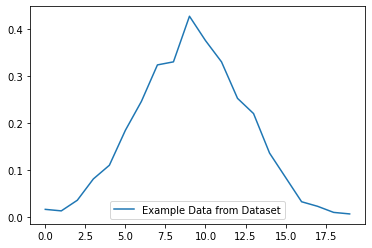

In [4]:
plt.plot(dataset[0], label="Example Data from Dataset")
plt.legend()
plt.show()

## 2) Train Model

########## MODEL ##########
AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=20, out_features=12, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=12, out_features=7, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=7, out_features=5, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=5, out_features=3, bias=True)
    (7): PReLU(num_parameters=1)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=5, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=5, out_features=7, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=7, out_features=12, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=12, out_features=20, bias=True)
  )
  (criterion): MSELoss()
)
########## MODEL ##########


/opt/homebrew/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


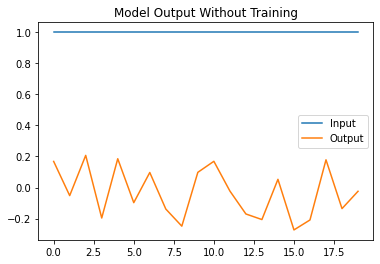

In [5]:
model = AutoEncoder(latent_dimension=latent_dimension,
                    variable_space=variable_space,
                    steps=steps)

# overview of the model structure
print("########## MODEL ##########")
print(model)
print("########## MODEL ##########")

# before training (ensure that model has correct sizes)
data_no_training = torch.ones(variable_space)
result_not_training = model.forward(data_no_training)

plt.plot(data_no_training.detach().numpy(), label="Input")
plt.plot(result_not_training.detach().numpy(), label="Output")
plt.legend()
plt.title("Model Output Without Training")
plt.show()

In [7]:
trainer = Trainer(max_epochs=10)
trainer.fit(model,dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type       | Params
-----------------------------------------
0 | encoder   | Sequential | 405   
1 | decoder   | Sequential | 421   
2 | criterion | MSELoss    | 0     
-----------------------------------------
826       Trainable params
0         Non-trainable params
826       Total params
0.003     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

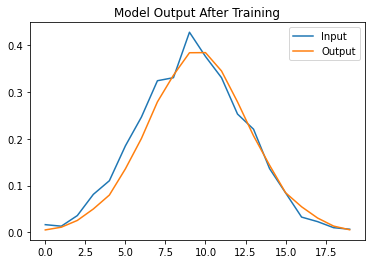

In [8]:
data_after_training = dataset[0]
result_after_training = model.forward(data_after_training)

plt.plot(data_after_training.detach().numpy(), label="Input")
plt.plot(result_after_training.detach().numpy(), label="Output")
plt.legend()
plt.title("Model Output After Training")
plt.show()